# Simple Linear Regression Model Building

# Loading Data

In [1]:
bonds = read.delim("bonds.txt", row.names = 1)
head(bonds)
tail(bonds)

CouponRate,BidPrice
7.000,92.94
9.000,101.44
7.000,92.66
4.125,94.50
13.125,118.94
8.000,96.75


,CouponRate,BidPrice
30,8.875,99.88
31,8.125,95.16
32,9.000,100.66
33,9.250,102.31
34,7.000,88.00
35,3.500,94.53


## Coupon Rate
CouponRate refers to the fixed interest rate that the issuer pays to the lender

## Bid Price
BidPrice is the price someone is willing to pay for the bond

In [2]:
str(bonds)

'data.frame':	35 obs. of  2 variables:
 $ CouponRate: num  7 9 7 4.12 13.12 ...
 $ BidPrice  : num  92.9 101.4 92.7 94.5 118.9 ...


In [3]:
summary(bonds)

   CouponRate        BidPrice     
 Min.   : 3.000   Min.   : 88.00  
 1st Qu.: 8.062   1st Qu.: 95.95  
 Median : 8.875   Median :100.38  
 Mean   : 8.921   Mean   :102.14  
 3rd Qu.:10.438   3rd Qu.:108.11  
 Max.   :13.125   Max.   :119.06  

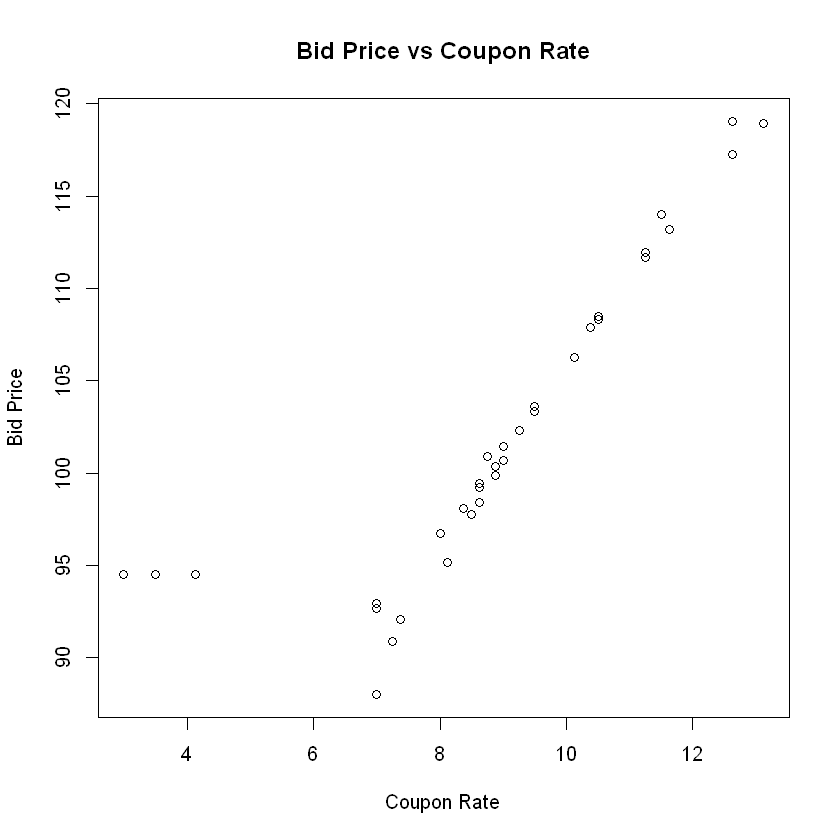

In [4]:
plot(bonds$CouponRate, bonds$BidPrice, main = "Bid Price vs Coupon Rate", xlab= "Coupon Rate", ylab="Bid Price")

## Linear Regression Model Required to remove Outliers

integer(0)

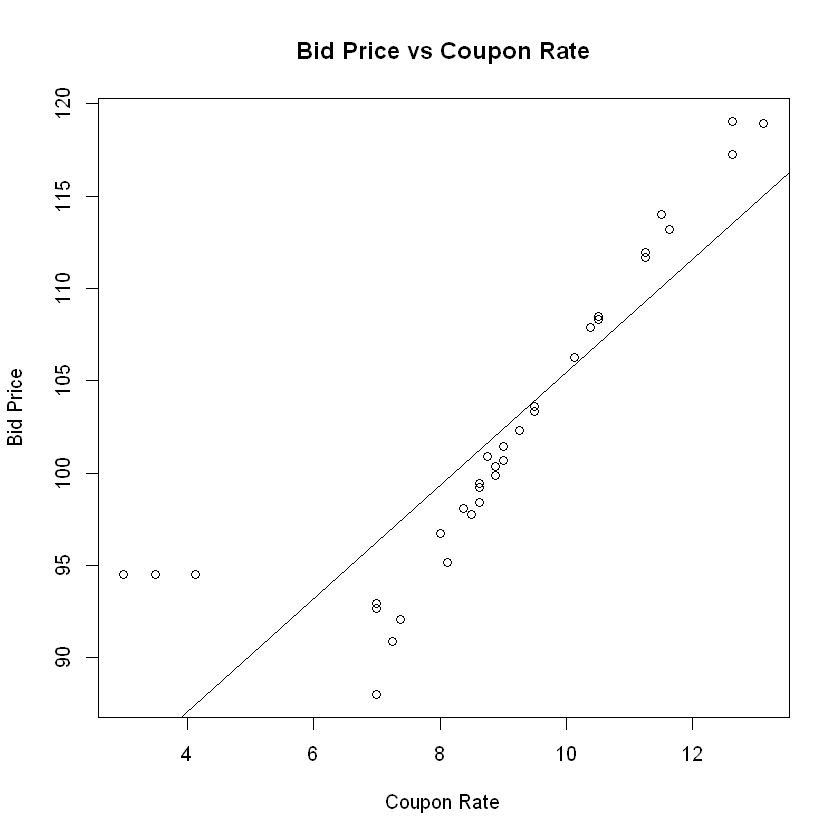

In [5]:
bondsmod = lm(bonds$BidPrice ~ bonds$CouponRate)

plot(bonds$CouponRate, bonds$BidPrice, main = "Bid Price vs Coupon Rate", xlab= "Coupon Rate", ylab="Bid Price") + abline(bondsmod)

In [6]:
summary(bondsmod)


Call:
lm(formula = bonds$BidPrice ~ bonds$CouponRate)

Residuals:
   Min     1Q Median     3Q    Max 
-8.249 -2.470 -0.838  2.550 10.515 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       74.7866     2.8267  26.458  < 2e-16 ***
bonds$CouponRate   3.0661     0.3068   9.994 1.64e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.175 on 33 degrees of freedom
Multiple R-squared:  0.7516,	Adjusted R-squared:  0.7441 
F-statistic: 99.87 on 1 and 33 DF,  p-value: 1.645e-11


# First Level Model Assesment

R<sup>2</sup> = 0.7516 -> Not a good enough fit

# Hypothesis Testing

## Hypothesis Testing on coefficients

Checking wether the Slope coefficient is significant or not

**Null Hypothesis**: H<sub>0</sub> : m = 0 => y<sub>i</sub> = c + e<sub>i</sub>     *\[Reduced Model\]*

**Alternate Hypothesis**: H<sub>1</sub> : m != 0 => y<sub>i</sub> = c + mx<sub>i</sub> + e<sub>i</sub>    *\[Full Model\]*

** This is a Two Sided Test **

alpha = 0.05 i.e 95% confidence level

In [7]:
alpha = 0.05
n = 35
p = 1
qt(p = 1-(alpha/2), df = n-p-1)

[1] 2.034515

## Confidence Interval:

c = 3.0661 (Estimate)

Standard Deviation associated = 0.3068 (standard error)

Hence, confidence level = estimate +/- (critical value * standard error)

In [8]:
3.0661 - (2.034515*0.3068)
3.0661 + (2.034515*0.3068)

[1] 2.441911

[1] 3.690289

## Conclusion:

* Reject Null Hypothesis since the confidence interval does not include 0
* Thus Slope of the regression line is significant

# Checking for Outliers

Points are considered to be an outlier if the corresponding standardized residuals lie outside \[-2, 2\] at 5% level of significance.

Remove outliers one at a time for each iteration and apply regression after removal of one.

Keep doing so unless all the Outliers are removed.

# Residual Analysis

integer(0)

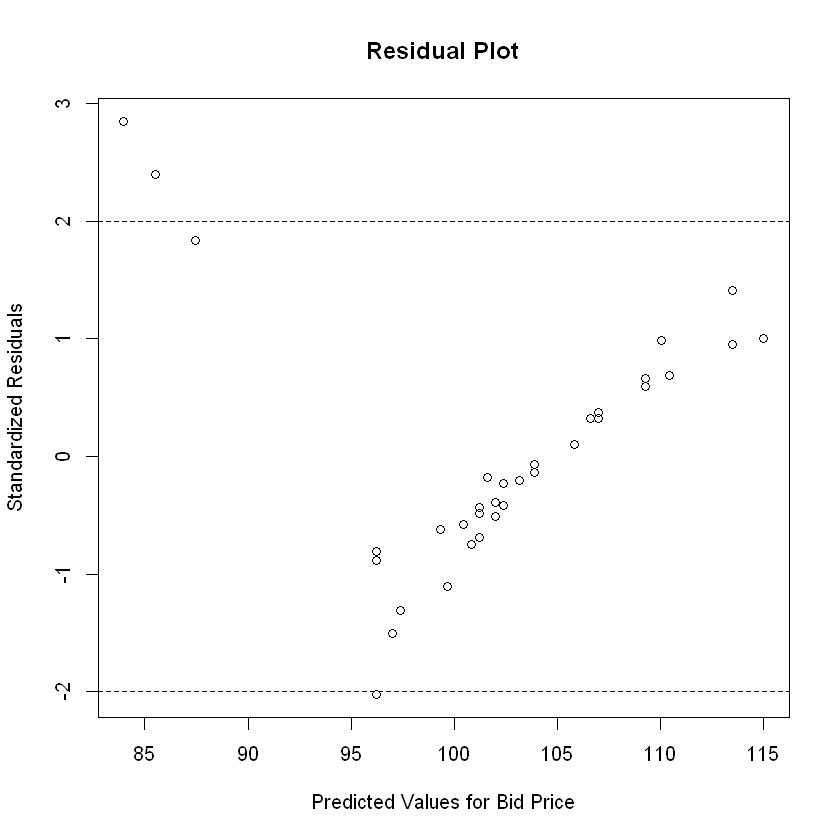

In [9]:
plot(bondsmod$fitted.values, rstandard(bondsmod), main="Residual Plot", xlab="Predicted Values for Bid Price", ylab="Standardized Residuals") + abline(h=2, lty=2) + abline(h=-2, lty=2)

In [10]:
# Allows you to click on the points straight from the plotted graph in Rstudio
outliers = identify(bondsmod$fitted.values, rstandard(bondsmod))

ERROR: Error in identify.default(bondsmod$fitted.values, rstandard(bondsmod)): plot.new has not been called yet


In [13]:
outliers = which(as.matrix(rstandard(bondsmod)) > 2 | as.matrix(rstandard(bondsmod) < -2))
outliers = c(4, outliers) # Four was added as its very close to the +2 line
outliers

[1]  4 13 34 35

# Removing Outliers all at once

In [14]:
bonds_new = bonds[-outliers,]

In [15]:
bondsmod_new = lm(bonds_new$BidPrice ~ bonds_new$CouponRate)

In [16]:
summary(bondsmod)
summary(bondsmod_new)


Call:
lm(formula = bonds$BidPrice ~ bonds$CouponRate)

Residuals:
   Min     1Q Median     3Q    Max 
-8.249 -2.470 -0.838  2.550 10.515 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       74.7866     2.8267  26.458  < 2e-16 ***
bonds$CouponRate   3.0661     0.3068   9.994 1.64e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.175 on 33 degrees of freedom
Multiple R-squared:  0.7516,	Adjusted R-squared:  0.7441 
F-statistic: 99.87 on 1 and 33 DF,  p-value: 1.645e-11



Call:
lm(formula = bonds_new$BidPrice ~ bonds_new$CouponRate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77099 -0.37978  0.08147  0.44518  1.47401 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          58.28581    0.88993   65.50   <2e-16 ***
bonds_new$CouponRate  4.74002    0.09227   51.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8434 on 29 degrees of freedom
Multiple R-squared:  0.9891,	Adjusted R-squared:  0.9888 
F-statistic:  2639 on 1 and 29 DF,  p-value: < 2.2e-16


integer(0)

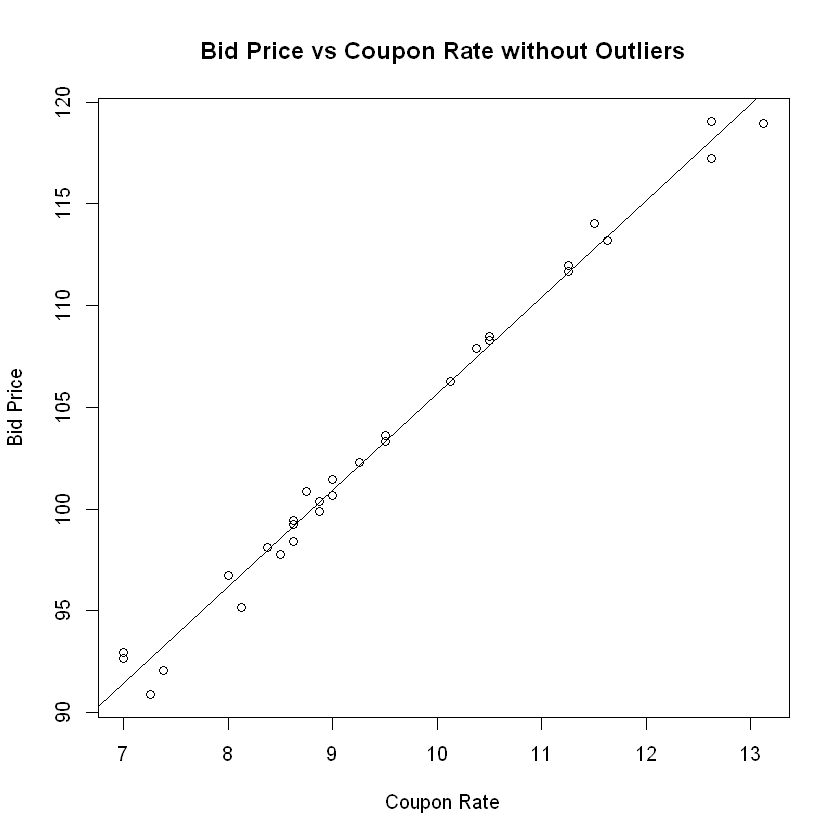

In [17]:
plot(bonds_new$CouponRate, bonds_new$BidPrice, main = "Bid Price vs Coupon Rate without Outliers", xlab= "Coupon Rate", ylab="Bid Price") + abline(bondsmod_new)

# Conclusion

Thus removing Outliers improves the best fitted line.